IX.2424 Introduction to Artificial Intelligence Project - CHEUNG, Hoi Ching 63369

In [498]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [455]:
df = pd.read_csv("~/Documents/ISEP/AI_intro/latestdata.csv",sep=",",index_col=0);

Part A: Analysis the dataset

In order to analyse the dataset, you have to extract some statistical information from the given dataset, for example: the type of data, the missing values, outliers, the correlation between variables, etc. If there are missing values, you can replace them by the mean, median or mode of the concerning variable.


In [447]:
df.head(5)

,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
ID,,,,,,,,,,,,,,,,,,,,,
000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN


In [540]:
print(df.dtypes)
print(df.shape)

df_processed = df.copy()

age                          object
sex                          object
city                         object
province                     object
country                      object
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary         bool
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                       object
admin2                       object
admin1                      

In [541]:
#fill empty records, drop more than half of the records are empty

def fill_mean(col):
    return col.fillna(col.mean())
def fill_median(col):
    return col.fillna(col.median())
def fill_mode(col):
    mode = col.mode()
    if not mode.empty:
        return col.fillna(mode[0])
    else:
        return col
    
def fill_null(df, threshold=0.9):
    empty_cols = []
    for column in df.columns:
        missing_fraction = df[column].isnull().mean()
        if missing_fraction < threshold:
            if df[column].dtype == 'float64':
                df[column] = fill_median(df[column])
            else:
                df[column] = fill_mode(df[column])
        else:
            empty_cols.append(column)
    df.drop(columns=empty_cols, inplace=True)
    return df

df_processed = fill_null(df_processed)

print(df_processed.dtypes)
print(df_processed.shape)

age                         object
sex                         object
city                        object
province                    object
country                     object
latitude                   float64
longitude                  float64
geo_resolution              object
date_confirmation           object
chronic_disease_binary        bool
source                      object
outcome                     object
admin2                      object
admin1                      object
country_new                 object
admin_id                   float64
data_moderator_initials     object
travel_history_binary         bool
dtype: object
(2676311, 18)


In [542]:
df_processed.head()

,age,sex,city,province,country,latitude,longitude,geo_resolution,date_confirmation,chronic_disease_binary,source,outcome,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
ID,,,,,,,,,,,,,,,,,,
000-1-1,35-59,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,14.02.2020,False,https://www.scmp.com/news/hong-kong/health-env...,"critical condition, intubated as of 14.02.2020",Moscow,Hong Kong,China,8029.0,TR,False
000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,21.02.2020,False,https://www.corriere.it/cronache/20_febbraio_2...,death,Moscow,Veneto,Italy,8954.0,TR,False
000-1-100,61,female,Moscow,Central,Singapore,1.353460,103.815100,admin0,14.02.2020,False,https://www.channelnewsasia.com/news/singapore...,discharge,Moscow,Central,Singapore,200.0,TR,False
000-1-1000,35-59,male,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,26.01.2020,False,https://news.163.com/special/epidemic/?spssid=...,Hospitalized,Zhengzhou City,Henan,China,10091.0,TR,False
000-1-10000,35-59,male,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,14.02.2020,False,http://hc.jiangxi.gov.cn/doc/2020/02/15/138898...,Hospitalized,Pingxiang City,Jiangxi,China,7060.0,TR,False


In [543]:
#drop unecessary columns

def drop_if_exist(col, df):
    if col in df.columns:
        df.drop(columns=col, inplace=True)

drop_if_exist('source', df_processed)

In [544]:
#convert age

def age_mean(age):
    if isinstance(age, str) and '-' in age:
        age_range = age.split('-')
        age_start = age_range[0]
        age_end = age_range[1]
        if age_start == '':
            return float(age_end)
        elif age_end == '':
            return float(age_start)
        else:
            age_start = int(age_start)
            age_end = int(age_end)
            mean_age = (age_start + age_end) / 2
            return float(mean_age)
    else:
        try:
            return float(age)
        except ValueError:
            return np.nan

df_processed['age'] = df_processed['age'].apply(age_mean)
df_processed['age'] = fill_median(df_processed['age'])

In [555]:
#convert sex

df_processed['sex'] = df_processed['sex'].map({'male': 1, 'female': 0})

In [545]:
#convert date

def date_mid(date):
    if isinstance(date, str) and '-' in date:
        date = date.strip()
        date_range = date.split('-')
        date_start = date_range[0].strip()
        date_end = date_range[1].strip()
        if date_start == "":
            return pd.to_datetime(date_end, format='%d.%m.%Y')
        elif date_end == "":
            return pd.to_datetime(date_start, format='%d.%m.%Y')
        else:
            date_start = pd.to_datetime(date_start, format='%d.%m.%Y')
            date_end = pd.to_datetime(date_end, format='%d.%m.%Y')
            date_mid = date_start + (date_end - date_start) / 2
            return date_mid
    else:
        try:
            date = pd.to_datetime(date, format='%d.%m.%Y')
            return date
        except ValueError:
            return date.median()

df_processed['date_confirmation'] = df_processed['date_confirmation'].apply(date_mid)


In [546]:
#convert outcome

outcome_mapping = {
    'critical condition, intubated as of 14.02.2020': 'Critical',
    'death': 'Dead',
    'discharge': 'Discharged',
    'Hospitalized': 'Hospitalized',
    'discharged': 'Discharged',
    'Discharged': 'Discharged',
    'Discharged from hospital': 'Discharged',
    'not hospitalized': 'Not Hospitalized',
    'recovered': 'Recovered',
    'recovering at home 03.03.2020': 'Recovering at Home',
    'released from quarantine': 'Released from Quarantine',
    'severe': 'Severe',
    'stable': 'Stable',
    'died': 'Dead',
    'Death': 'Dead',
    'dead': 'Dead',
    'Symptoms only improved with cough. Currently hospitalized for follow-up.': 'Hospitalized',
    'treated in an intensive care unit (14.02.2020)': 'ICU',
    'Alive': 'Alive',
    'Dead': 'Dead',
    'Recovered': 'Recovered',
    'Stable': 'Stable',
    'Died': 'Dead',
    'Deceased': 'Dead',
    'stable condition': 'Stable',
    'Under treatment': 'Under Treatment',
    'Critical condition': 'Critical',
    'Receiving Treatment': 'Under Treatment',
    'severe illness': 'Severe',
    'unstable': 'Unstable',
    'critical condition': 'Critical',
    'Migrated': 'Migrated',
    'Migrated_Other': 'Migrated',
    'https://www.mspbs.gov.py/covid-19.php': 'Unknown'
}

serverity_mapping = {
    'Released from Quarantine': 0,
    'Alive': 1,
    'Recovered': 2,
    'Recovering at Home': 3,
    'Not Hospitalized': 4,
    'Discharged': 5,
    'Migrated': 6,
    'Under Treatment': 7,
    'Hospitalized': 8,
    'Stable': 9,
    'Unstable': 10,
    'Severe': 11,
    'ICU': 12,
    'Critical': 13,
    'Dead': 14,
    'Unknown': 8   
}


df_processed['outcome'] = df_processed['outcome'].map(outcome_mapping)
print(df_processed['outcome'].unique())
print(df_processed['outcome'].mode())
df_processed['outcome'] = df_processed['outcome'].map(serverity_mapping)
print(df_processed['outcome'].unique())

['Critical' 'Dead' 'Discharged' 'Hospitalized' 'Not Hospitalized'
 'Recovered' 'Recovering at Home' 'Released from Quarantine' 'Severe'
 'Stable' 'ICU' 'Alive' 'Under Treatment' 'Unstable' 'Migrated' 'Unknown']
0    Hospitalized
Name: outcome, dtype: object
[13 14  5  8  4  2  3  0 11  9 12  1  7 10  6]


In [547]:
# convert the rest
df_processed['city'].str.lower()
df_processed['city'] = df_processed['city'].astype('category').cat.codes
print(df_processed['city'].unique())

[6892 7848 4909 ... 6539 2897 6355]


In [548]:
df_processed['province'] = df_processed['province'].str.lower()
df_processed['province'] = df_processed['province'].astype('category').cat.codes

In [549]:
df_processed['country'] = df_processed['country'].astype('category').cat.codes

In [550]:
df_processed['geo_resolution'] = df_processed['geo_resolution'].astype('category').cat.codes
print(df_processed['geo_resolution'].unique())

[5 1 3 4 2 0]


In [551]:
df_processed['admin2'] = df_processed['admin2'].astype('category').cat.codes
df_processed['admin1'] = df_processed['admin1'].astype('category').cat.codes
df_processed['country_new'] = df_processed['country_new'].astype('category').cat.codes

In [552]:
df_processed['data_moderator_initials'] = df_processed['data_moderator_initials'].str.upper()
df_processed['data_moderator_initials'] = df_processed['data_moderator_initials'].astype('category').cat.codes
print(df_processed['data_moderator_initials'].unique())

[8 0 7 6 1 2 4 5 3 9]


In [553]:
df_processed.head()

,age,sex,city,province,country,latitude,longitude,geo_resolution,date_confirmation,chronic_disease_binary,outcome,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
ID,,,,,,,,,,,,,,,,,
000-1-1,47.0,male,6892,448,28,22.365019,114.133808,5,2020-02-14,False,13,1237,224,29,8029.0,8,False
000-1-10,78.0,male,7848,1142,64,45.297748,11.658382,5,2020-02-21,False,14,1237,575,65,8954.0,8,False
000-1-100,61.0,female,4909,229,119,1.353460,103.815100,1,2020-02-14,False,5,1237,110,119,200.0,8,False
000-1-1000,47.0,male,8313,436,28,34.629310,113.468000,3,2020-01-26,False,8,2062,217,29,10091.0,8,False
000-1-10000,47.0,male,5753,515,28,27.513560,113.902900,3,2020-02-14,False,8,1432,245,29,7060.0,8,False


In [556]:
print(df_processed.shape)
print(df_processed.dtypes)

(2676311, 17)
age                               float64
sex                                 int64
city                                int16
province                            int16
country                             int16
latitude                          float64
longitude                         float64
geo_resolution                       int8
date_confirmation          datetime64[ns]
chronic_disease_binary               bool
outcome                             int64
admin2                              int16
admin1                              int16
country_new                         int16
admin_id                          float64
data_moderator_initials              int8
travel_history_binary                bool
dtype: object


1. Compute the correlations between the variables. Which variables are most correlated with the target (outcome)? Explain the results.

In [557]:
correlation_matrix = df_processed.corr()
target_correlation = correlation_matrix['outcome'].sort_values(ascending=False)
print(target_correlation)
#print(abs(target_correlation).sort_values(ascending=False))

outcome                    1.000000
latitude                   0.144954
country_new                0.131777
country                    0.126515
data_moderator_initials    0.082804
admin1                     0.071961
city                       0.062587
chronic_disease_binary     0.021620
travel_history_binary      0.015965
age                       -0.004489
admin2                    -0.017573
sex                       -0.048013
province                  -0.105206
admin_id                  -0.124530
geo_resolution            -0.165848
date_confirmation         -0.197443
longitude                 -0.247107
Name: outcome, dtype: float64


The variables that are most correlated with the target are 'longitude', 'date_confirmation', and 'geo_resolution'.

longitude (-0.247107): This negative correlation suggests that as the longitude increases (moving eastward), the outcome variable tends to decrease. As the outcome variable is mapped according to severity with a higher number being more severe, this suggests that the outcome is less severe in eastern countries and vice versa.

date_confirmation (-0.197443): This negative correlation indicates that as the date of confirmation becomes more recent, the outcome tends to decrease. This might suggest improvements in outcomes over time, possibly due to better treatments or interventions, and the weaker viral power of COVID19 viruses.

geo_resolution (-0.165848): This negative correlation suggests that different levels of geographical resolution are inversely related to the outcome. This could imply that outcomes vary significantly with the granularity of location data, potentially due to local healthcare infrastructure or reporting practices.

2. Plot the dataset using scatter and analyze the obtained result. Use the PCA (Principal Component Analysis) to project the dataset.


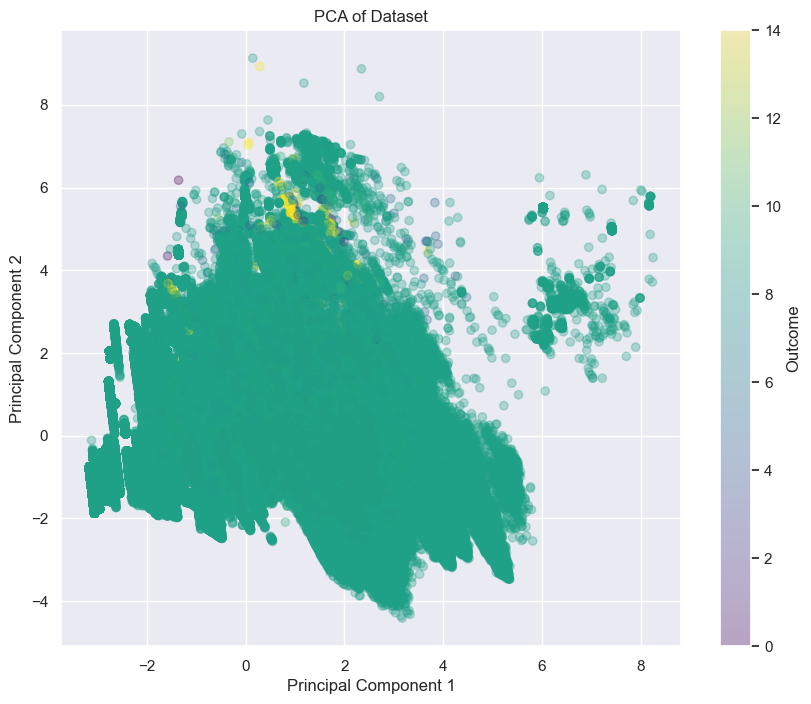

Explained variance by PC1: 0.22
Explained variance by PC2: 0.12


In [558]:
df_plot = df_processed.copy()
df_plot['date_confirmation'] = df_plot['date_confirmation'].astype('int64') / 10**9 
X = df_plot.drop(columns=['outcome'])   

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df.index = df_processed.index
pca_df['outcome'] = df_processed['outcome']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['outcome'], cmap='viridis', alpha=0.3)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Outcome')
plt.show()

explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PC1: {explained_variance[0]:.2f}')
print(f'Explained variance by PC2: {explained_variance[1]:.2f}')

Part B : Bayets Nets

1. What is the probability for a person to have symptoms of COVID-19 (symptom onset=date) if this person visited Wuhan (visiting Wuhan = 1)? Consider that (symptom onset=N/A) means that the patient is asymp- tomatic.

In [563]:
df_prob = df.copy()
df_prob['travel_history_location'] = df_prob['travel_history_location'].str.lower()
wuhan_visitors = df_prob[df_prob['travel_history_location'].str.contains('wuhan', na=False) | 
                      (df_prob['lives_in_Wuhan'] == '1') | 
                      (df_prob['travel_history_binary'] == '1')]

total_wuhan_visitors = len(wuhan_visitors)

symptomatic_wuhan_visitors = wuhan_visitors['date_onset_symptoms'].notna().sum()

probability1 = symptomatic_wuhan_visitors / total_wuhan_visitors

print(probability1)

0.5294759825327511


2. What is the probability for a person to be a true patient if this person has symptoms of COVID-19 (symptom onset=date) and this person visited Wuhan?

In [576]:
df_prob2 = df_prob[(df_prob['date_onset_symptoms'].notnull()) & (df_prob['travel_history_location'].str.contains('wuhan', na=False) | 
                      (df_prob['lives_in_Wuhan'] == '1') | 
                      (df_prob['travel_history_binary'] == '1'))]

total_rows = df_prob2.shape[0]
print(total_rows)
true_patients = df_prob2['date_confirmation'].notnull().sum()

probability2 = true_patients / total_rows

print(probability2)

485
1.0


3. What is the probability for a person to death if this person visited Wuhan?

In [573]:
df_prob['outcome'] = df_prob['outcome'].map(outcome_mapping)
df_prob['outcome'] = fill_mode(df_prob['outcome'])
dead_count = (wuhan_visitors['outcome'] == 'Dead').sum()
probability3 = dead_count / total_wuhan_visitors
print(probability3)

0.007641921397379912


4. Estimate the average recovery interval for a patient if this person visited Wuhan?

In [579]:
wuhan_visitors['date_onset_symptoms'] = date_mid(wuhan_visitors['date_onset_symptoms'])
wuhan_visitors['date_death_or_discharge'] = date_mid(wuhan_visitors['date_death_or_discharge'])
wuhan_visitors = wuhan_visitors[wuhan_visitors['date_onset_symptoms'].notnull() & wuhan_visitors['date_death_or_discharge'].notnull()]

wuhan_visitors['recovery_interval'] = wuhan_visitors['date_death_or_discharge'] - wuhan_visitors['date_onset_symptoms']

wuhan_patients = wuhan_visitors[wuhan_visitors['recovery_interval'] >= pd.Timedelta(0)]

average_recovery_interval = wuhan_patients['recovery_interval'].mean()

print("Average recovery interval for patients who visited Wuhan:", average_recovery_interval)


Average recovery interval for patients who visited Wuhan: 19 days 17:44:20.869565217


Part C: Machine Learning

In this part, we use a machine learning method in order to predict the outcome: patients outcome as either ’died’ or ’discharged’ from hospital. You can use the K-Nearest Neighbours (K-NN) or Bayes Classification.

In [588]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


1. The obtained results should be validated using some external indexes as prediction error (Confusion matrix and Accuracy) or others as Recall, F- Measure, etc. The obtained results should be analyzed in the report and provide a solution to ameliorate the results.

In [590]:
y = df_processed['outcome']
for col in df_processed.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


AttributeError: 'Flags' object has no attribute 'c_contiguous'

2. Use the Regression to predict the age of persons based on other variables. You have the choice on these explanatory variables? How you choose these variables? Compute the quality of the prediction using MSE error (Mean Squared Error).

In [591]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred_reg = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error: {mse}")

TypeError: C variable sklearn.utils._random.DEFAULT_SEED has wrong signature (expected __pyx_t_7sklearn_5utils_9_typedefs_uint32_t, got __pyx_t_7sklearn_5utils_7_random_UINT32_t)

3. Apply a clustering method (K-means) on the dataset to segment the persons into different clusters. Use the Silhouette index to find out the best number of clusters. Plot the results using scatter to visually analyze the clustering structure.

In [593]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (/Users/jas/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py)

In [ ]:
k_range = range(2, 11)
silhouette_scores = []
k_values = []
data_scaled = X

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)
    k_values.append(k)

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()

best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

kmeans = KMeans(n_clusters=best_k, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)
data['Cluster'] = cluster_labels

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='viridis')
plt.title('K-means Clustering with Optimal Number of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Part D: Improving the results and Theoretical formalism

1. The data is unbalanced. You can balance it by reducing randomly the majority class. Assume that you extract randomly samples that are balanced. How will the prediction results change?

Balancing the dataset can improve the precision and recall for the minority class because the model will have more balanced exposure to both classes during training.

The F1 score is likely to improve for the minority class, reflecting better overall performance in predicting the minority class.

Balancing the dataset also helps reduce the bias, leading to a more equitable treatment of both classes.

There is a possible Decrease in Overall Accuracy.

By reducing the majority class, the dataset size decreases, which could lead to overfitting, especially if the remaining data is not representative of the entire population.

2. How can you better manage the missing values?

We can replace them with a constant value, or use the KNN algorithm to predict their values.

3. To find the best parameters for the models, the Grid-search algorithm can be used which is available in scikit-learn library. Explain the algorithm and use it for the learning models to find the best parameters.

Grid search works by exhaustively searching through a specified parameter grid (combinations of hyperparameters) to determine the optimal combination for a given model. This is achieved by training and evaluating the model for each combination of hyperparameters using cross-validation, and selecting the combination that yields the best performance metric.

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

features = df.columns
target = 'outcome'
data = data[features + [target]].dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
if data['age'].dtype == 'object':
    data['age'] = label_encoder.fit_transform(data['age'])
data['outcome'] = label_encoder.fit_transform(data['outcome'])

X = data[features]
y = data[target]

from sklearn.impute import KNNImputer, SimpleImputer

numeric_features = ['age', 'latitude', 'longitude']
knn_imputer = KNNImputer(n_neighbors=5)
X[numeric_features] = knn_imputer.fit_transform(X[numeric_features])

categorical_features = ['chronic_disease_binary', 'travel_history_binary']
mode_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = mode_imputer.fit_transform(X[categorical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:, 1]))


4. Give the algorithmically (mathematical) formalism of the method which gives the best results. Explain all the parameters of the used method and their impact on the results. Some comparison with public results should be made to conclude the project.

The Random Forest (RF) algorithm is an ensemble learning method for classification (and regression) that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 
Key Parameters and Their Impact
n_estimators: The number of trees in the forest.

Impact: Increasing the number of trees generally improves performance and reduces overfitting, but with diminishing returns. More trees also increase computational cost.
max_depth: The maximum depth of the trees.

Impact: Limiting the depth can reduce overfitting, especially with noisy data. Too shallow trees may underfit.
min_samples_split: The minimum number of samples required to split an internal node.

Impact: A higher value prevents the model from learning overly specific patterns, which reduces overfitting but may lead to underfitting.
min_samples_leaf: The minimum number of samples required to be at a leaf node.

Impact: Setting this to a higher number can smooth the model, preventing it from learning spurious patterns.
max_features: The number of features to consider when looking for the best split.

Impact: Reducing the number of features considered for each split can help to reduce overfitting and improve generalization.
